## Digital Technologies and Value Creation

In [2]:
#Importing important libraries
import pandas as pd
import numpy as np
from datetime import datetime
from tbats import TBATS
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Reading the data
data = pd.read_csv('DTVC-Q1.csv')
data.head()

,Date,Uniques,People,Visits,Page Views,Mobile Web
0,Apr-10,"2,53,49,036","1,90,20,118","6,98,37,544","1,01,57,61,920",NaN
1,May-10,"2,80,01,532","2,10,96,692","7,58,02,128","1,06,14,56,128",NaN
2,Jun-10,"3,02,79,004","2,24,96,896","8,62,79,520","1,26,53,48,480",NaN
3,Jul-10,"3,32,37,588","2,45,71,154","9,62,91,688","1,47,08,84,480",NaN
4,Aug-10,"3,73,26,484","2,77,44,680","10,57,18,912","1,66,44,30,976",NaN


In [4]:
# Convert 'People' column to numeric after removing commas
data['People'] = data['People'].str.replace(',', '').astype(float)

# Convert 'Date' to datetime format to filter data up to May 2013
data['Date'] = pd.to_datetime(data['Date'], format='%b-%y')

# Filter data from April 2010 to May 2013
filtered_data = data[(data['Date'] >= datetime(2010, 4, 1)) & (data['Date'] <= datetime(2013, 5, 1))]

# Get the initial number of people (April 2010) and final number of people (May 2013)
initial_people_apr_2010 = data.loc[data['Date'] == datetime(2010, 4, 1), 'People'].values[0]
# final_people_may_2013 = people_may_2013
final_people_may_2013=filtered_data.loc[filtered_data['Date'] == datetime(2013, 5, 1), 'People'].values[0]
# Calculate the number of months from May 2013 to December 2022
months = (2022 - 2013) * 12 + (12 - 5)
# Calculate the number of months between April 2010 and May 2013
n_months = (2013 - 2010) * 12 + (5 - 4)

# Calculate the AMGR using the formula
amgr = (final_people_may_2013 / initial_people_apr_2010) ** (1/n_months) - 1

amgr*100

5.470512847280795

In [18]:
people_dec_2022_amgr =  final_people_may_2013 * ((1 + amgr) ** months)
people_dec_2022_amgr

62392729684.68201

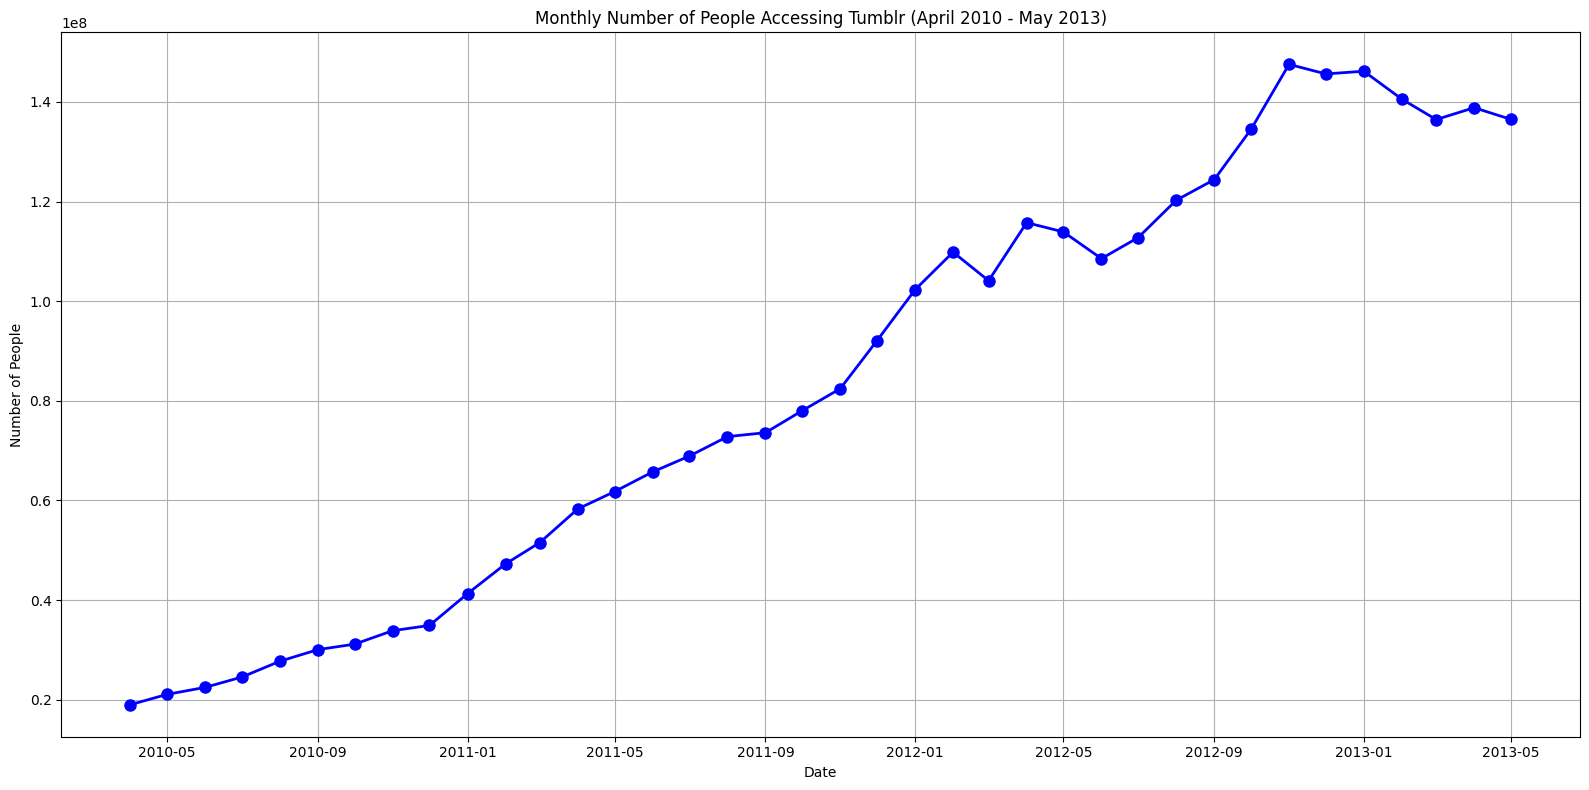

In [6]:
import matplotlib.pyplot as plt

# We will plot the original 'People' column to see the trend from April 2010 to May 2013
time_series_data = data[(data['Date'] >= datetime(2010, 4, 1)) & (data['Date'] <= datetime(2013, 5, 1))]

plt.figure(figsize=(16, 8))
plt.plot(time_series_data['Date'], time_series_data['People'], marker='o', linestyle='-', color='blue', markerfacecolor='blue',linewidth='2',markersize='8')
plt.title('Monthly Number of People Accessing Tumblr (April 2010 - May 2013)')
plt.xlabel('Date')
plt.ylabel('Number of People')
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

## Question 2
### ETS

In [7]:
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

In [19]:
data['People'].head()

0    19020118.0
1    21096692.0
2    22496896.0
3    24571154.0
4    27744680.0
Name: People, dtype: float64

##### We now fit the ETS model keeping the Error and trend as additive.

In [9]:
model1 = ETSModel(data['People'],
                 error='add',
                 trend='add',damped_trend=True,
                 seasonal=None,seasonal_periods=12)
res1 = model1.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         1 variables are exactly at the bounds

At iterate    0    f=  1.77092D+01    |proj g|=  8.99900D-01

At iterate    1    f=  1.68450D+01    |proj g|=  1.80000D-01

At iterate    2    f=  1.68204D+01    |proj g|=  1.40120D-01

At iterate    3    f=  1.68059D+01    |proj g|=  2.59009D-01

At iterate    4    f=  1.67908D+01    |proj g|=  2.87045D-02

At iterate    5    f=  1.67907D+01    |proj g|=  1.24757D-02

At iterate    6    f=  1.67905D+01    |proj g|=  1.47001D-02

At iterate    7    f=  1.67899D+01    |proj g|=  2.41076D-02

At iterate    8    f=  1.67885D+01    |proj g|=  3.32975D-02

At iterate    9    f=  1.67879D+01    |proj g|=  6.18442D-02

At iterate   10    f=  1.67876D+01    |proj g|=  9.59279D-02

At iterate   11    f=  1.67871D+01    |proj g|=  1.39800D-01

At iterate   12    f=  1.67871D+01    |proj g|=  1.40211D-01

At iterate   13    f=  1.6

##### We now look at the forecast of the ETS model and plot it to look at the trend in the forecast

In [10]:
forecast1 = res1.forecast(115)
forecast1

38     1.379938e+08
39     1.394789e+08
40     1.409343e+08
41     1.423606e+08
42     1.437584e+08
           ...     
148    2.042033e+08
149    2.043642e+08
150    2.045219e+08
151    2.046765e+08
152    2.048279e+08
Name: simulation, Length: 115, dtype: float64

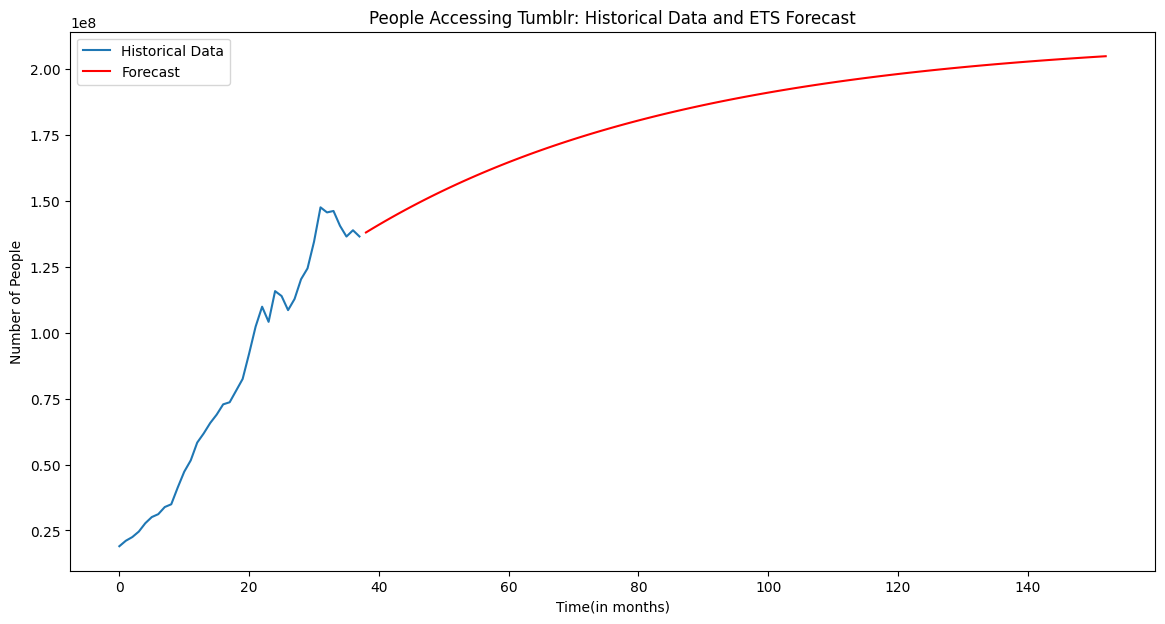

In [11]:
plt.figure(figsize=(14, 7))
plt.plot(data['People'], label='Historical Data')
plt.plot(forecast1, label='Forecast',color='red')
plt.title('People Accessing Tumblr: Historical Data and ETS Forecast')
plt.xlabel('Time(in months)')
plt.ylabel('Number of People(in Hundred Million)')
plt.legend()
plt.show()

### TBATS

##### We now use the TBATS model to forecast the data and compare our findings with the ETS findings. 

In [12]:
# Fit the TBATS model (assuming seasonal_periods=(12,) for monthly data with yearly seasonality)
tbats_estimator = TBATS(seasonal_periods=(12,))
tbats_model = tbats_estimator.fit(data['People'])

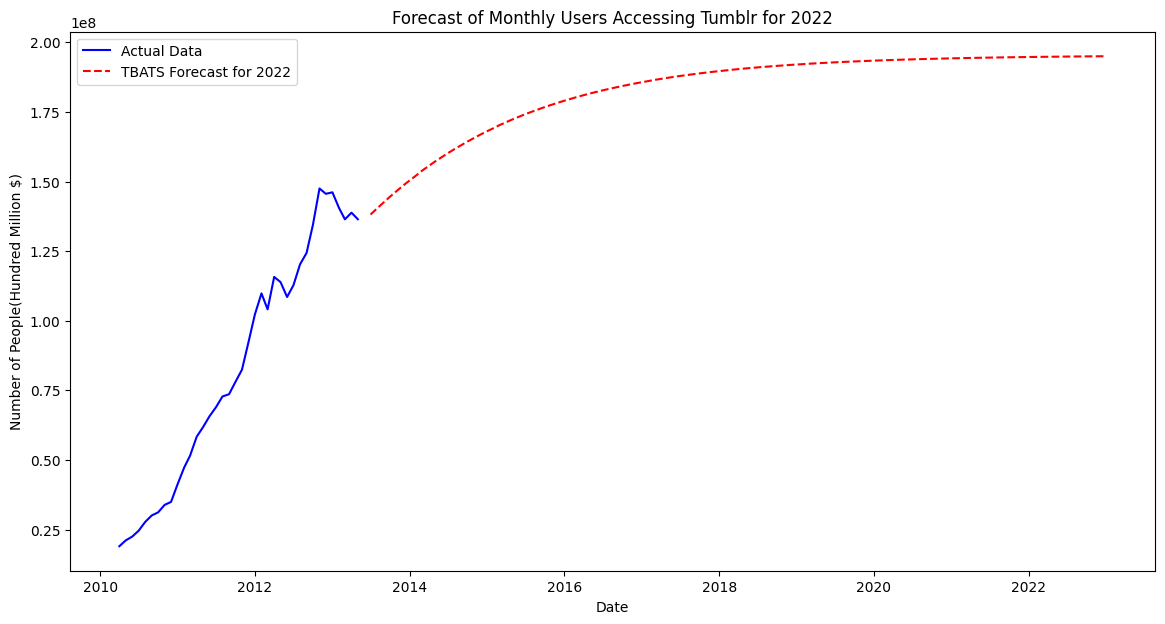

In [13]:
# Calculate steps to forecast based on the last date in your dataset to the end of 2022
last_date = pd.Timestamp('2013-05-30') # Ensure last_date is a Timestamp
end_date = pd.Timestamp('2022-12-31')

# # Calculate the number of months between the last date and the end date
months_difference = ((end_date.year - last_date.year) * 12) + end_date.month - last_date.month

# Use this months_difference as steps_to_forecast
steps_to_forecast = months_difference

# Forecasting
tbats_forecast_2022 = tbats_model.forecast(steps=steps_to_forecast)

# Create a date range for the forecasted values
forecast_dates = pd.date_range(start=last_date + pd.offsets.MonthBegin(1), periods=steps_to_forecast, freq='M')

# Plotting the forecast alongside actual data
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['People'], label='Actual Data', color='blue')
plt.plot(forecast_dates, tbats_forecast_2022, label='TBATS Forecast for 2022', linestyle='--', color='red')
plt.title('Forecast of Monthly Users Accessing Tumblr for 2022')
plt.xlabel('Date')
plt.ylabel('Number of People(Hundred Million $)')
plt.legend()

# Save the plot to a file in the current directory
plt.savefig('tumblr_forecast_tbats.png')

plt.show()

In [15]:
tbats_forecast_2022

array([1.38160624e+08, 1.40376432e+08, 1.42518281e+08, 1.44587595e+08,
       1.46585877e+08, 1.48514689e+08, 1.50375648e+08, 1.52170410e+08,
       1.53900659e+08, 1.55568104e+08, 1.57174462e+08, 1.58721461e+08,
       1.60210824e+08, 1.61644269e+08, 1.63023505e+08, 1.64350221e+08,
       1.65626089e+08, 1.66852758e+08, 1.68031849e+08, 1.69164956e+08,
       1.70253643e+08, 1.71299440e+08, 1.72303845e+08, 1.73268318e+08,
       1.74194287e+08, 1.75083141e+08, 1.75936233e+08, 1.76754877e+08,
       1.77540352e+08, 1.78293898e+08, 1.79016719e+08, 1.79709981e+08,
       1.80374813e+08, 1.81012308e+08, 1.81623525e+08, 1.82209486e+08,
       1.82771179e+08, 1.83309558e+08, 1.83825544e+08, 1.84320027e+08,
       1.84793863e+08, 1.85247879e+08, 1.85682872e+08, 1.86099608e+08,
       1.86498827e+08, 1.86881240e+08, 1.87247532e+08, 1.87598361e+08,
       1.87934361e+08, 1.88256141e+08, 1.88564288e+08, 1.88859364e+08,
       1.89141910e+08, 1.89412446e+08, 1.89671471e+08, 1.89919465e+08,
      

In [16]:
tbats_forecast_2022[-1]

195029811.0604729

In [17]:
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from tbats import TBATS, BATS

# Calculate the AIC of the fitted ETS model
aic_ETS = res1.aic
print(f"AIC Value for ETS: {aic_ETS}")

# Calculate AIC of the fitted TBATS model
aic_tbats = tbats_model.aic
print(f"AIC Value for TBATS: {aic_tbats}")

AIC Value for ETS: 1286.2719203464999
AIC Value for TBATS: 1292.7807876711363


## Web Scrapping

##### The data scraping script employs Selenium and BeautifulSoup for scraping dynamically loaded tables from a webpage. Selenium automates browser interactions, navigating to the site, handling consent dialogues, and clicking the "Show More" buttons to reveal all table data. This step is essential for accessing content that loads incrementally, a technique known as "lazy loading" used to enhance page performance. However, Selenium's efficiency diminishes when parsing and extracting large volumes of HTML data. 

##### Enter BeautifulSoup, a tool designed for fast and straightforward HTML parsing, which excels in navigating complex page structures and extracting content. After Selenium ensures all table data is fully visible, BeautifulSoup takes over to parse the HTML and extract the table data into structured formats. This combination harnesses Selenium's ability to interact with dynamic web elements and BeautifulSoup's parsing efficiency, offering a powerful solution for scraping data from webpages that rely on JavaScript for content loading.

In [27]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import pandas as pd
import time

# Setup Chrome WebDriver
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)
wait = WebDriverWait(driver, 20)

# Open the URL
url = 'https://www.zippia.com/tumblr-careers-1393075/revenue/#'
driver.get(url)

# Click the consent button if present
try:
    consent_button_xpath = "//button[contains(@class, 'fc-cta-consent') and contains(@class, 'fc-primary-button')]"
    wait.until(EC.element_to_be_clickable((By.XPATH, consent_button_xpath))).click()
    print("Consent button clicked.")
except Exception as e:
    print("No consent button found or error clicking consent button:", str(e))

# Define the XPath to locate the tables within the specified class
xpath_query = "//div[contains(@class, 'w-730')]//table[contains(@class, 'table_table__wzWKU') and contains(@class, 'custom-table') and contains(@class, 'table_colsWidthBalanced__Iso8n')]"

# Find all matching tables
tables = wait.until(EC.presence_of_all_elements_located((By.XPATH, xpath_query)))

# Iterate through each table to fully load its data
for index, table in enumerate(tables, start=1):
    while True:
        try:
            # Attempt to click the "Show More" button if it exists
            show_more_button_xpath = ".//following-sibling::div[@data-testid='table-show-more']/button"
            show_more_button = driver.find_element(By.XPATH, show_more_button_xpath)
            driver.execute_script("arguments[0].click();", show_more_button)
            print("Clicked 'Show more'")
            time.sleep(1)  # Wait for content to load
        except Exception as e:
            print("No 'Show more' button found or end of table reached.")
            break

# Now that all tables are fully loaded, parse the page source with BeautifulSoup
soup = BeautifulSoup(driver.page_source, 'html.parser')

# Close the WebDriver
driver.quit()

# Use BeautifulSoup to find all tables
soup_tables = soup.find_all('table', class_='table_table__wzWKU custom-table table_colsWidthBalanced__Iso8n')
dfs = []  # List to hold all DataFrames

for table in soup_tables:
    headers = [th.get_text().strip() for th in table.find_all('th')]
    rows = []
    for row in table.find_all('tr')[1:]:  # Exclude header row
        cols = [td.get_text().strip() for td in row.find_all('td')]
        rows.append(cols)
    df = pd.DataFrame(rows, columns=headers)
    dfs.append(df)

# Save each DataFrame to a separate CSV file
for index, df in enumerate(dfs):
    filename = f'Table_{index}.csv'
    df.to_csv(filename, index=False)
    print(f'Saved {filename}')


Consent button clicked.
No 'Show more' button found or end of table reached.
No 'Show more' button found or end of table reached.
No 'Show more' button found or end of table reached.
Saved Table_0.csv
Saved Table_1.csv
Saved Table_2.csv


In [28]:
import pandas as pd

# Define the paths to your CSV files
file_path_1 = '/Users/abhishekroy/Downloads/vscode folder/final/table_0.csv'  # Update this path to your actual file location
file_path_2 = '/Users/abhishekroy/Downloads/vscode folder/final/table_1.csv'  # Update this path to your actual file location

# Load the CSV files into pandas dataframes
df1 = pd.read_csv(file_path_1)
df2 = pd.read_csv(file_path_2)

# Merge the dataframes on the 'Series' column from df1 and 'Security Type' column from df2
term_df = pd.merge(df1, df2, left_on='Series', right_on='Security Type')

# Save the merged dataframe to a new CSV file
output_file_path = '/path/to/merged_output.csv'  # Update this path to where you want to save the merged file
term_df.to_csv('/Users/abhishekroy/Downloads/vscode folder/mergedfile2.csv', index=False)

print(f"Merged file saved to {output_file_path}")


Merged file saved to /path/to/merged_output.csv


In [29]:
dfs

[     Series Round Size     Date
 0  Series A      $750K  10/2007
 1  Series B      $4.5M  12/2008
 2  Series C        $5M  04/2010
 3  Series D       $30M  11/2010
 4  Series E       $85M  09/2011,
                 Investors Security Type
 0           Spark Capital      Series A
 1   Union Square Ventures      Series A
 2           Albert Wenger      Series A
 3               Betaworks      Series A
 4            Fred Seibert      Series A
 5           Spark Capital      Series B
 6   Union Square Ventures      Series B
 7           Spark Capital      Series C
 8   Union Square Ventures      Series C
 9           Spark Capital      Series D
 10  Union Square Ventures      Series D
 11        Sequoia Capital      Series D
 12          Spark Capital      Series E
 13  Union Square Ventures      Series E
 14            Tim Kendall      Series E
 15           137 Ventures      Series E
 16      The Chernin Group      Series E
 17       Insight Partners      Series E
 18        TUESDAY CAP

In [104]:
data_viz = pd.read_csv('merged_table_viz1.csv')
data_viz

,Series,Round Size,Date,Investors,Security Type
0,Series A,$750K,10/2007,Spark Capital,Series A
1,Series A,$750K,10/2007,Union Square Ventures,Series A
2,Series A,$750K,10/2007,Albert Wenger,Series A
3,Series A,$750K,10/2007,Betaworks,Series A
4,Series A,$750K,10/2007,Fred Seibert,Series A
5,Series B,$4.5M,12/2008,Spark Capital,Series B
6,Series B,$4.5M,12/2008,Union Square Ventures,Series B
7,Series C,$5M,04/2010,Spark Capital,Series C
8,Series C,$5M,04/2010,Union Square Ventures,Series C
9,Series D,$30M,11/2010,Spark Capital,Series D


In [30]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
from selenium.common.exceptions import NoSuchElementException, TimeoutException
import pandas as pd
import time

# Initialize WebDriver
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)

# List of websites to search
websites = [
    "https://blog.gwi.com/chart-of-the-day/what-has-yahoo-actually-acquired-a-snapshot-of-tumblr-in-q1-2013/",
    "https://www.businessinsider.com/heres-tumblrs-total-revenue-for-2012-and-how-it-will-make-a-profit-in-2013-2013-1?r=US&IR=T",
    "https://andycroll.com/other/tumblr-founder-shares-and-dilution/?utm_source=pocket_saves",
    "https://www.businessinsider.com/tumblr-will-start-selling-ad-units-on-may-2-2012-4?IR=T&r=US&utm_source=pocket_saves",
    "https://gtokio.tumblr.com/post/50800238137/the-company-started-selling-ads-in-may-2012-and",
    "https://www.daniellemorrill.com/?s=tumblr"
]

# Keywords to search for
search_terms = ["Tumblr"]

# DataFrame to store the results
df = pd.DataFrame(columns=["Website", "Search Term", "Context", "Location"])

# Function to handle pop-up buttons like cookie consents
def click_popup_buttons():
    try:
        # Wait for the cookie consent button to appear and click it
        cookie_button = WebDriverWait(driver, 10).until(
            EC.element_to_be_clickable((By.XPATH, "//button[contains(@class, 'accept') or contains(text(), 'Accept') or contains(text(), 'I Agree')]"))
        )
        cookie_button.click()
    except TimeoutException:
        print("No cookie consent button found or timed out waiting for it.")

# Function to click buttons based on a contained <path> element's class
def click_buttons_by_path_class():
    try:
        clickable_elements = driver.find_elements(By.XPATH, "//button[.//path[contains(@class, 'custom-cursor-on-hover')]] | //a[.//path[contains(@class, 'custom-cursor-on-hover')]]")
        for element in clickable_elements:
            if element.is_displayed():
                ActionChains(driver).move_to_element(element).click().perform()
                time.sleep(1)  # Brief pause after clicking to allow any actions to process
                break  # Break after the first click to avoid multiple clicks
    except NoSuchElementException:
        print("No clickable element found with the specified <path> class.")
    except TimeoutException:
        print("Timed out waiting for clickable elements.")

# Function to extract context from text
def extract_context(text, keyword, num_words=150):
    words = text.split()
    for i, word in enumerate(words):
        if keyword.lower() in word.lower():
            start = max(i - num_words, 0)
            end = min(i + num_words + 1, len(words))
            return ' '.join(words[start:end])
    return ''

# Adjusted function to prioritize scraping content
def search_and_scrape(website):
    for term in search_terms:
        driver.get(website)
        time.sleep(5)  # Allow the website to load

        # Attempt to click cookie consent button if present
        click_popup_buttons()

        # Scrape content first
        paragraphs = driver.find_elements(By.TAG_NAME, "p")
        for p in paragraphs:
            for keyword in search_terms:
                if keyword.lower() in p.text.lower():
                    context = extract_context(p.text, keyword)
                    # Save the data in the DataFrame
                    df.loc[len(df)] = [website, term, context, str(p.location)]

        # Then look for and use the search bar if necessary
        try:
            search_bar = WebDriverWait(driver, 10).until(
                EC.visibility_of_element_located((By.XPATH, "//input[contains(@class, 'search')]"))
            )
            search_bar.clear()
            search_bar.send_keys(term)
            search_bar.send_keys(Keys.RETURN)
            time.sleep(5)  # Allow search results to load
        except NoSuchElementException:
            print(f"Search bar not found on {website}")
        except Exception as e:
            print(f"An error occurred while searching: {e}")

try:
    for website in websites:
        search_and_scrape(website)
finally:
    driver.quit()

# Save the DataFrame to a CSV file
filename = "/Users/abhishekroy/Downloads/vscode folder/scraped_data2.csv"  # Adjust the path according to your environment
df.to_csv(filename, index=False)
print(f"Data saved to {filename}")


No cookie consent button found or timed out waiting for it.
An error occurred while searching: Message: 
Stacktrace:
0   chromedriver                        0x000000011015c2f8 chromedriver + 4625144
1   chromedriver                        0x0000000110153ea3 chromedriver + 4591267
2   chromedriver                        0x000000010fd52e6a chromedriver + 392810
3   chromedriver                        0x000000010fd9e41d chromedriver + 701469
4   chromedriver                        0x000000010fd9e5b1 chromedriver + 701873
5   chromedriver                        0x000000010fde21c4 chromedriver + 979396
6   chromedriver                        0x000000010fdc089d chromedriver + 841885
7   chromedriver                        0x000000010fddf68f chromedriver + 968335
8   chromedriver                        0x000000010fdc0613 chromedriver + 841235
9   chromedriver                        0x000000010fd913da chromedriver + 648154
10  chromedriver                        0x000000010fd91d1e chromedriver

In [31]:
df

,Website,Search Term,Context,Location
0,https://blog.gwi.com/chart-of-the-day/what-has...,Tumblr,"Yesterday, Yahoo! finally confirmed its all-ca...","{'x': 334, 'y': 760}"
1,https://blog.gwi.com/chart-of-the-day/what-has...,Tumblr,Despite the lacklustre performance relative to...,"{'x': 334, 'y': 1937}"
2,https://blog.gwi.com/chart-of-the-day/what-has...,Tumblr,"With the Tumblr acquisition, Yahoo! is certain...","{'x': 334, 'y': 2814}"
3,https://blog.gwi.com/chart-of-the-day/what-has...,Tumblr,"For more data on Tumblr active usage, demograp...","{'x': 334, 'y': 3420}"
4,https://blog.gwi.com/chart-of-the-day/what-has...,Tumblr,GlobalWebIndex PRO license holders are also ab...,"{'x': 334, 'y': 3517}"
5,https://www.businessinsider.com/heres-tumblrs-...,Tumblr,Tumblr made $13 million in revenue in 2012 and...,"{'x': 135, 'y': 690}"
6,https://www.businessinsider.com/heres-tumblrs-...,Tumblr,This is all good news for the company. Tumblr ...,"{'x': 135, 'y': 1361}"
7,https://www.businessinsider.com/heres-tumblrs-...,Tumblr,But so far Tumblr has been very careful. It ha...,"{'x': 135, 'y': 1814}"
8,https://www.businessinsider.com/heres-tumblrs-...,Tumblr,Tumblr hasn't even begun to sell most of its r...,"{'x': 135, 'y': 2355}"
9,https://www.businessinsider.com/heres-tumblrs-...,Tumblr,"Given its traffic, if Tumblr were to install e...","{'x': 135, 'y': 3116}"


In [32]:
# Import necessary libraries
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import time

# Setup Chrome WebDriver
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)

# Open the URL
url = 'https://www.demandsage.com/tumblr-statistics/'
driver.get(url)

# Scroll to the end of the page to ensure all content is loaded
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(5)  # Adjust the sleep time if necessary

# XPath to find tables with class 'has-fixed-layout' within figures with class 'wp-block-table is-style-stripes'
xpath_query = "//figure[contains(@class, 'wp-block-table') and contains(@class, 'is-style-stripes')]//table[contains(@class, 'has-fixed-layout')]"

# Find all matching tables
tables = driver.find_elements(By.XPATH, xpath_query)

# List to hold all table data
all_tables_data = []

# Extract data from each table
for table in tables:
    current_table_data = []
    # Find all rows in the table
    rows = table.find_elements(By.TAG_NAME, "tr")
    for row in rows:
        # Extract text from each cell
        cells = row.find_elements(By.TAG_NAME, "td")
        if not cells:  # If no td tags are found, try th tags for header rows
            cells = row.find_elements(By.TAG_NAME, "th")
        row_data = [cell.text for cell in cells]
        current_table_data.append(row_data)
    all_tables_data.append(current_table_data)

# Close the WebDriver
driver.quit()

# Assuming each table has headers in the first row and data in subsequent rows,
# convert each table's data into a DataFrame
dataframes = [pd.DataFrame(data[1:], columns=data[0]) for data in all_tables_data if data]

# Optionally, you can concatenate all DataFrames into one if they have the same structure
# final_df = pd.concat(dataframes, ignore_index=True)

# Example: Save each DataFrame to a separate CSV file or process as needed
for index, df in enumerate(dataframes):
    csv_filename = f'tumblr_table_{index}.csv'
    df.to_csv(csv_filename, index=False)


In [33]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import pandas as pd

# Path to chromedriver executable

# SEC filing URL
url = 'https://www.sec.gov/Archives/edgar/data/1011006/000119312513327068/d540713d10q.htm#tx540713_6'

# Set up the Chrome WebDriver

driver = webdriver.Chrome()

# Navigate to the webpage
driver.get(url)

# Wait for the page to load completely
driver.implicitly_wait(10)

# Specify the correct XPath for the table you're interested in
# You'll need to update this based on the actual structure you find
table_xpath = '/html/body/document/type/sequence/filename/description/text/table[28]'  # Update this XPath

# Find the table element
table_element = driver.find_element(By.XPATH, table_xpath)

# Extract table data. You might need to adjust the logic here depending on the table structure
rows = table_element.find_elements(By.TAG_NAME, "tr")
data = []
for row in rows:
    cells = row.find_elements(By.TAG_NAME, "td")  # Adjust if necessary (e.g., "th" for header cells)
    data.append([cell.text for cell in cells])

# Convert the list into a pandas DataFrame
df = pd.DataFrame(data)

# Define column names if necessary
# df.columns = ['Column1', 'Column2', ...]

# Close the WebDriver
driver.quit()

# Print or process the DataFrame
print(df)
df.to_csv('/Users/abhishekroy/Downloads/vscode folder/husain_data.csv',index=False)


                                               0   1  2          3   4
0                                                                     
1        Cash and marketable securities acquired      $     16,587    
2                 Other tangible assets acquired            73,978    
3                 Amortizable intangible assets:                      
4                           Developed technology            23,700    
5   Customer contracts and related relationships           182,400    
6                                     Trade name            56,500    
7                                       Goodwill           750,893    
8                                                                     
9                          Total assets acquired         1,104,058    
10                           Liabilities assumed          (113,847  ) 
11                                                                    
12                                         Total      $    990,211    
13    

In [34]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import pandas as pd

# Path to chromedriver executable

# SEC filing URL
url = 'https://www.sec.gov/Archives/edgar/data/1011006/000119312513327068/d540713d10q.htm#tx540713_6'

# Set up the Chrome WebDriver

driver = webdriver.Chrome()

# Navigate to the webpage
driver.get(url)

# Wait for the page to load completely
driver.implicitly_wait(10)

# Specify the correct XPath for the table you're interested in
# You'll need to update this based on the actual structure you find
table_xpath = '/html/body/document/type/sequence/filename/description/text/table[29]'  # Update this XPath

# Find the table element
table_element = driver.find_element(By.XPATH, table_xpath)

# Extract table data. You might need to adjust the logic here depending on the table structure
rows = table_element.find_elements(By.TAG_NAME, "tr")
data = []
for row in rows:
    cells = row.find_elements(By.TAG_NAME, "td")  # Adjust if necessary (e.g., "th" for header cells)
    data.append([cell.text for cell in cells])

# Convert the list into a pandas DataFrame
df = pd.DataFrame(data)

# Define column names if necessary
# df.columns = ['Column1', 'Column2', ...]

# Close the WebDriver
driver.quit()

# Print or process the DataFrame
print(df)
df.to_csv('/Users/abhishekroy/Downloads/vscode folder/husain_data2.csv',index=False)


                                                  0   1                  2   \
0                                                                             
1                                                         December 31, 2012   
2                                                                       Net   
3  Customer, affiliate, and advertiser related re...                      $   
4                   Developed technology and patents                          
5          Trade names, trademarks, and domain names                          
6                                                                             
7                       Total intangible assets, net                      $   
8                                                                             

        3   4                       5  6        7   \
0                                                    
1                        June 30, 2013        None   
2               Gross Carrying\nAmount         

### We now visualize the Data Scrapped and collected for insights

In [3]:
datavis1 = pd.read_csv('merged_table_viz1.csv')
datavis1

,Series,Round Size,Date,Investors,Security Type
0,Series A,$750K,10/2007,Spark Capital,Series A
1,Series A,$750K,10/2007,Union Square Ventures,Series A
2,Series A,$750K,10/2007,Albert Wenger,Series A
3,Series A,$750K,10/2007,Betaworks,Series A
4,Series A,$750K,10/2007,Fred Seibert,Series A
5,Series B,$4.5M,12/2008,Spark Capital,Series B
6,Series B,$4.5M,12/2008,Union Square Ventures,Series B
7,Series C,$5M,04/2010,Spark Capital,Series C
8,Series C,$5M,04/2010,Union Square Ventures,Series C
9,Series D,$30M,11/2010,Spark Capital,Series D


In [4]:
# Assuming datavis1 is your DataFrame
# Convert 'Round Size' to numeric values
def convert_round_size(value):
    if value[-1] == 'K':
        return float(value[1:-1]) * 1000
    elif value[-1] == 'M':
        return float(value[1:-1]) * 1000000
    elif value[-1] == 'B':
        return float(value[1:-1]) * 1000000000
    else:
        return float(value[1:])

datavis1['Round Size'] = datavis1['Round Size'].apply(convert_round_size)
datavis1.rename(columns={'Round Size': 'Round Size (in $)'}, inplace=True)

# Convert 'Date' column to datetime format
datavis1['Date'] = pd.to_datetime(datavis1['Date'], format='%m/%Y')

# Drop 'Security Type' column
datavis1.drop('Security Type', axis=1, inplace=True)

# Display the modified DataFrame (without the index in the display, for showing purposes)
datavis1.to_string(index=False)

'  Series  Round Size (in $)       Date             Investors\nSeries A           750000.0 2007-10-01         Spark Capital\nSeries A           750000.0 2007-10-01 Union Square Ventures\nSeries A           750000.0 2007-10-01         Albert Wenger\nSeries A           750000.0 2007-10-01             Betaworks\nSeries A           750000.0 2007-10-01          Fred Seibert\nSeries B          4500000.0 2008-12-01         Spark Capital\nSeries B          4500000.0 2008-12-01 Union Square Ventures\nSeries C          5000000.0 2010-04-01         Spark Capital\nSeries C          5000000.0 2010-04-01 Union Square Ventures\nSeries D         30000000.0 2010-11-01         Spark Capital\nSeries D         30000000.0 2010-11-01 Union Square Ventures\nSeries D         30000000.0 2010-11-01       Sequoia Capital\nSeries E         85000000.0 2011-09-01         Spark Capital\nSeries E         85000000.0 2011-09-01 Union Square Ventures\nSeries E         85000000.0 2011-09-01           Tim Kendall\nSeries 

In [5]:
# Group by 'Series' and sum 'Round Size (in $)'
series_sum = datavis1.groupby('Series')['Round Size (in $)'].sum()

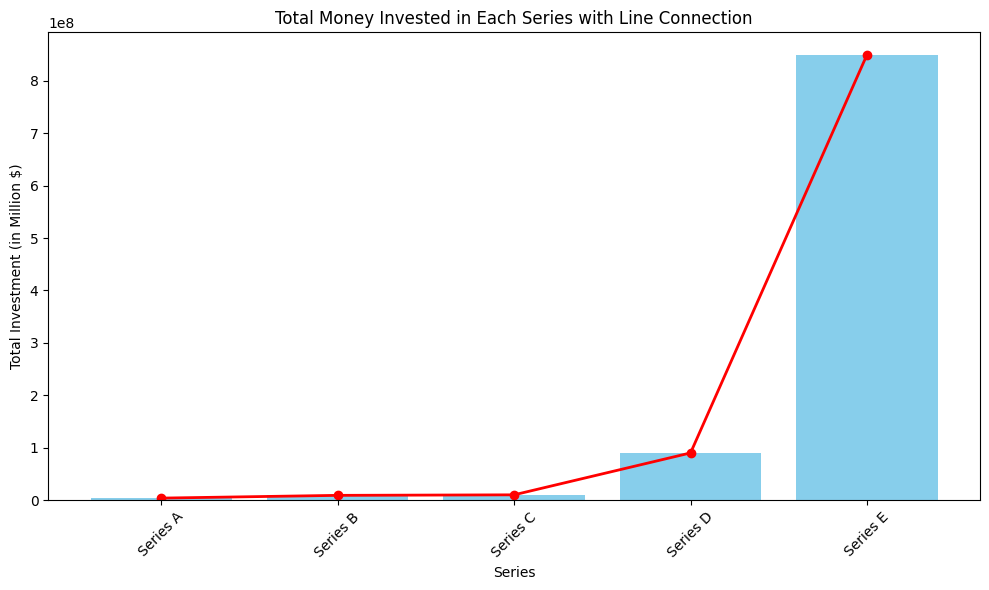

In [6]:
# Create figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the bar chart and capturing the bars
bars = ax.bar(series_sum.index, series_sum.values, color='skyblue')

# Extracting the center x-coordinates of the bars
bar_centers = [bar.get_x() + bar.get_width() / 2 for bar in bars]

# Extracting the height of the bars
bar_heights = [bar.get_height() for bar in bars]

# Plotting a line that connects the tops of the bars
ax.plot(bar_centers, bar_heights, color='red', marker='o', linestyle='-', linewidth=2)

plt.title('Total Money Invested in Each Series with Line Connection')
plt.xlabel('Series')
plt.ylabel('Total Investment (in Million $)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('tumblr_series_funds.png')
plt.show()


In [7]:
datavis2=pd.read_csv('total_value.csv',header=None)

total=125000

datavis2 = datavis2.replace({',': ''}, regex=True)
datavis2 = datavis2.apply(pd.to_numeric, errors='ignore')
print(datavis2)

                                              0        1    2
0       Cash and marketable securities acquired    16587     
1                Other tangible assets acquired    73978     
2                          Developed technology    23700     
3  Customer contracts and related relationships   182400     
4                                    Trade name    56500     
5                                      Goodwill   750893     
6                         Total assets acquired  1104058     
7                           Liabilities assumed   113847  NaN
8                                           NaN      NaN     
9                                           NaN              


In [8]:
datavis_2 = pd.DataFrame({'Description': ['Cash and marketable securities acquired', 'Other tangible assets acquired', 'Developed technology', 'Customer contracts and related relationships', 'Trade name','Liabilities assumed'],
                   'Value': [16587, 73978, 23700, 182400, 56500,113847]})
datavis_2 = datavis_2.dropna(subset=['Value'])
print(datavis_2)

                                    Description   Value
0       Cash and marketable securities acquired   16587
1                Other tangible assets acquired   73978
2                          Developed technology   23700
3  Customer contracts and related relationships  182400
4                                    Trade name   56500
5                           Liabilities assumed  113847


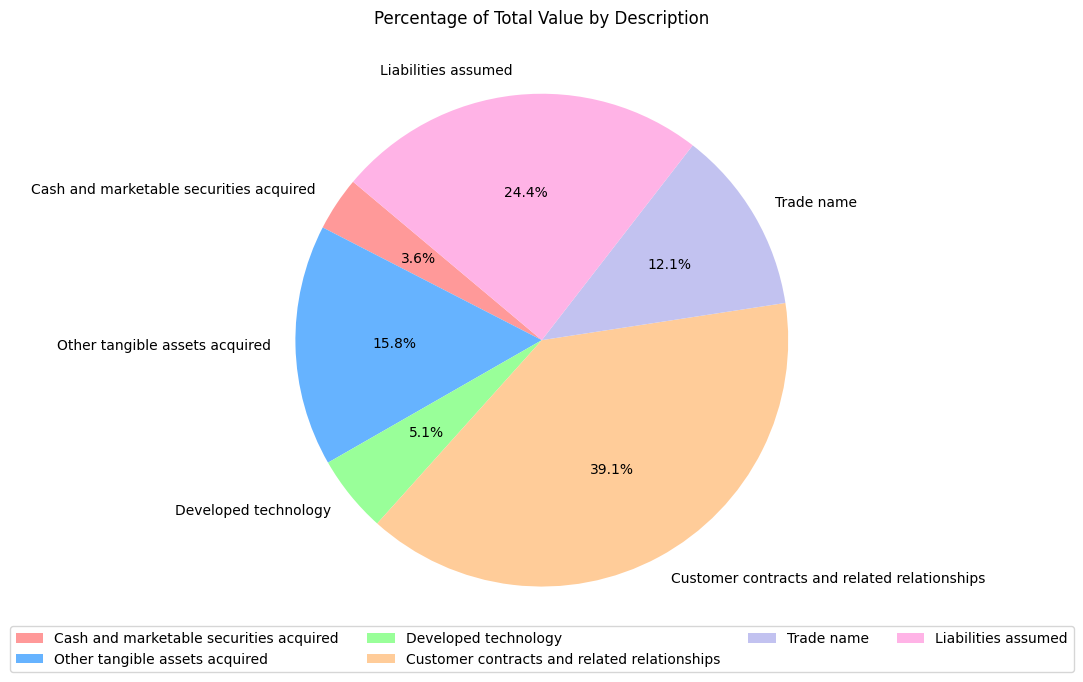

In [10]:
# Calculate the percentage
datavis_2['Percentage'] = datavis_2['Value'] / 1250000 * 100

# Create a pie chart with a white background
plt.figure(figsize=(8, 8), facecolor='white')

# Define colors based on percentage
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6','#c2f0c2','#ffb3b3']

# Plot the pie chart with different colors for each slice
plt.pie(datavis_2['Percentage'], labels=datavis_2['Description'], autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'linewidth': 0})

# Add a legend at the bottom
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=4)

# Add a title
plt.title('Percentage of Total Value by Description', color='black')

# Show the plot
plt.show()

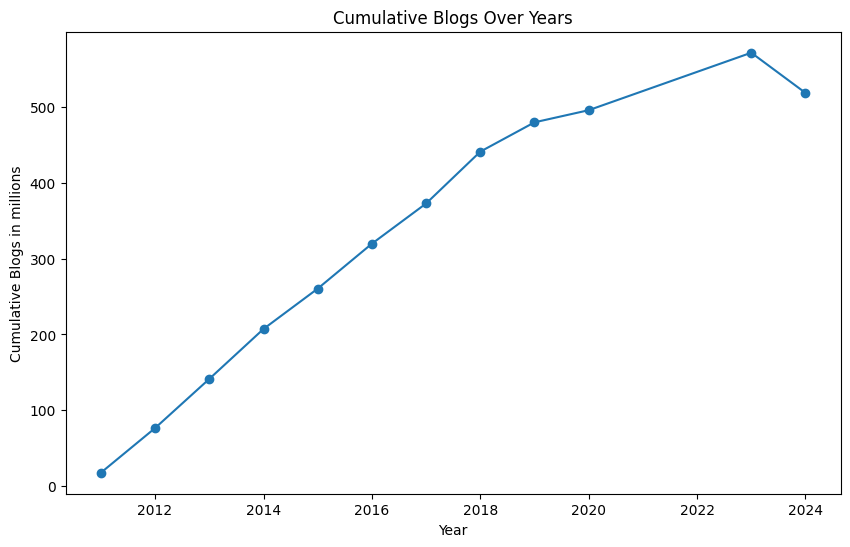

In [12]:
datavis3=pd.read_csv('cumulative_blogs.csv')
datavis3['Year'] = pd.to_datetime(datavis3['Year'], format='%Y')
datavis3['Cumulative Tumblr Blogs'] = pd.to_numeric(datavis3['Cumulative Tumblr Blogs'].str.replace(' million', ''))
plt.figure(figsize=(10, 6))
plt.plot(datavis3['Year'],datavis3['Cumulative Tumblr Blogs'],marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Cumulative Blogs in millions')
plt.title('Cumulative Blogs Over Years')


# Show the plot
plt.show()